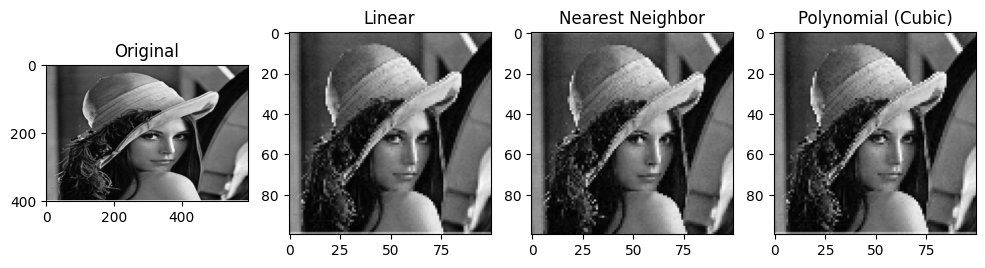

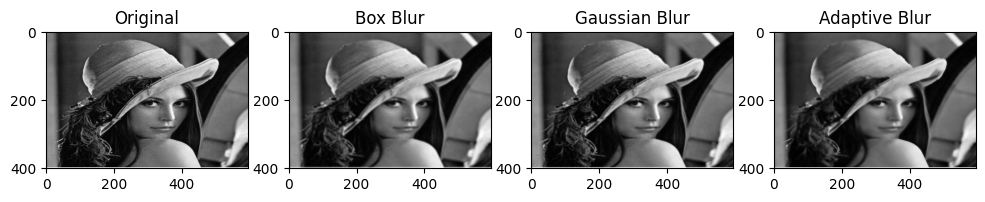

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread("Image1.jpg", cv2.IMREAD_GRAYSCALE)


linear_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LINEAR)
nearest_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_NEAREST)
cubic_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_CUBIC)


fig, axs = plt.subplots(1, 4, figsize=(12, 4))
axs[0].imshow(image, cmap="gray"), axs[0].set_title("Original")
axs[1].imshow(linear_resized, cmap="gray"), axs[1].set_title("Linear")
axs[2].imshow(nearest_resized, cmap="gray"), axs[2].set_title("Nearest Neighbor")
axs[3].imshow(cubic_resized, cmap="gray"), axs[3].set_title("Polynomial (Cubic)")
plt.show()

# Box Blur
box_blur = cv2.blur(image, (5, 5))

# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

# Adaptive Blurring (Using Bilateral Filter)
adaptive_blur = cv2.bilateralFilter(image, 9, 75, 75)

# Display results
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
axs[0].imshow(image, cmap="gray"), axs[0].set_title("Original")
axs[1].imshow(box_blur, cmap="gray"), axs[1].set_title("Box Blur")
axs[2].imshow(gaussian_blur, cmap="gray"), axs[2].set_title("Gaussian Blur")
axs[3].imshow(adaptive_blur, cmap="gray"), axs[3].set_title("Adaptive Blur")
plt.show()


=== Naive Bayes Model Performance ===
Accuracy: 0.8111
Precision: 0.8463
Recall: 0.8103
F1 Score: 0.8137


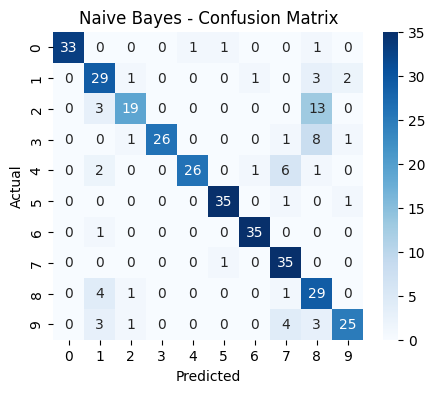

=== SVM Model Performance ===
Accuracy: 0.9917
Precision: 0.9920
Recall: 0.9915
F1 Score: 0.9916


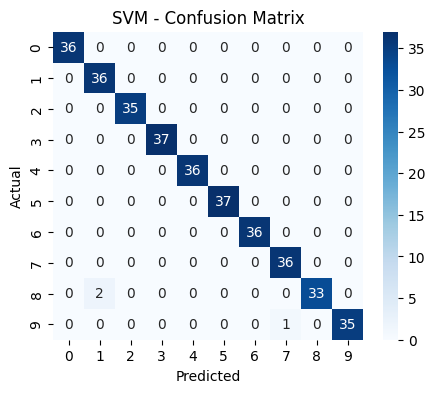

Naive Bayes - Mean Accuracy: 0.8069
SVM - Mean Accuracy: 0.9633
SVM Model AUC: 0.9995


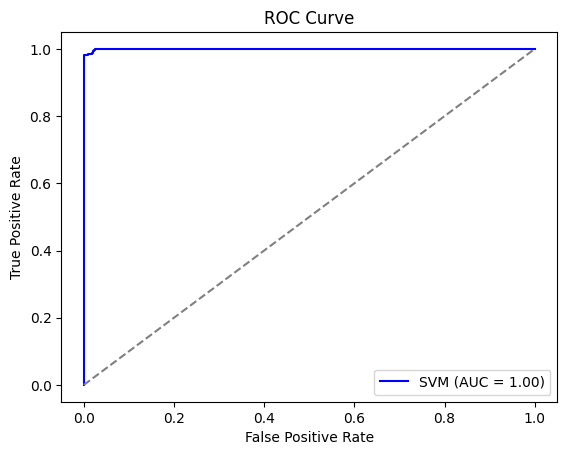

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Initialize models
nb_model = GaussianNB()
svm_model = SVC(kernel='rbf', probability=True)

# Train models
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
# Metrics function
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    cm = confusion_matrix(y_true, y_pred)

    print(f"=== {model_name} Model Performance ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate models
evaluate_model(y_test, y_pred_nb, "Naive Bayes")
evaluate_model(y_test, y_pred_svm, "SVM")
cv = StratifiedKFold(n_splits=5)

nb_cv_scores = cross_val_score(nb_model, X, y, cv=cv, scoring="accuracy")
svm_cv_scores = cross_val_score(svm_model, X, y, cv=cv, scoring="accuracy")

print(f"Naive Bayes - Mean Accuracy: {nb_cv_scores.mean():.4f}")
print(f"SVM - Mean Accuracy: {svm_cv_scores.mean():.4f}")
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=list(range(10)))

# Fit OneVsRest models
ovr_svm = OneVsRestClassifier(SVC(kernel='rbf', probability=True)).fit(X_train, y_train)
y_score_svm = ovr_svm.decision_function(X_test)

# Compute AUC
auc_svm = roc_auc_score(y_test_bin, y_score_svm, average="macro")
print(f"SVM Model AUC: {auc_svm:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score_svm.ravel())
plt.figure()
plt.plot(fpr, tpr, color="blue", label=f"SVM (AUC = {auc_svm:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
